In [1]:
%load_ext autoreload
%autoreload 2

In [69]:
import numpy as np

state = np.random.RandomState(123)

c = 1.54

n = 1000

x0 = state.normal(size=n)
x1 = list(map(lambda x: x if abs(x) <= c else -x,x0))

y_pair = np.abs(x0) > c

x2 = y_pair

x3 = state.normal(size=n)
#x4 = x3

noise = state.normal(size=(1,n))

y = y_pair+0.3*x3 > 0
X = np.vstack([x0,x1,x2,x3,noise]).T

In [161]:
import numpy as np

state = np.random.RandomState(123)


n = 1000

x0 = state.normal(size=n)
x1 = x0
x2 = x0

x3 = state.normal(size=n)
x4 = x3

noise = state.normal(size=(1,n))

y = x0+x3 > 0
X = np.vstack([x0,x1,x2,x3,x4,noise]).T

In [162]:
X.shape

(1000, 6)

matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


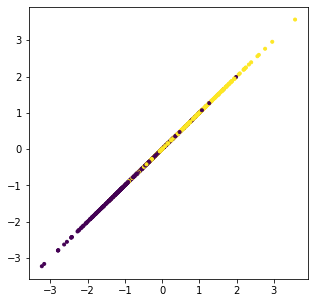

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.scatter(x0,x1,c=y,marker=".")

In [164]:
import logging, sys
# Create logger
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

# Create STDERR handler
handler = logging.StreamHandler(sys.stderr)
# ch.setLevel(logging.DEBUG)

# Create formatter and add it to the handler
formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Set STDERR handler as the only handler 
logger.handlers = [handler]

In [165]:
import squamish
from sklearn.preprocessing import scale

model = squamish.Main(debug=True,fpr=1e-6,n_resampling=100,random_state=state,n_jobs=6)
X = scale(X)
model.fit(X,y)

squamish.main - DEBUG - RF score 0.9690346758668966
squamish.main - DEBUG - importances [1714.58610258  758.79060255    0.         2178.44643665  204.2392015
   54.55558375]


Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations


squamish.stat - DEBUG - Shadow Bounds:(4.7587217466237774, 77.21090179351515)
squamish.main - DEBUG - Features from Boruta: [0 1 2 3 4]
squamish.main - DEBUG - Features from RF: [0 1 3 4]
squamish.algorithm - DEBUG - predetermined weakly [2]
squamish.algorithm - DEBUG - score bounds: (1.0, 1.0)
squamish.algorithm - DEBUG - ------------------- Feature f:0
squamish.algorithm - DEBUG - score without 0: 1.0
squamish.algorithm - DEBUG - removal_score:1.0-> W
squamish.algorithm - DEBUG - [(2276.541468129752, 2368.809687458172), (131.66244193152184, 156.2910342691312), (0.0, 0.0), (2037.9531073771, 2120.000408714284), (264.3612146499162, 317.2846215393208), (25.289333214724753, 68.89911863614783)]
squamish.algorithm - DEBUG - [0.         0.10705165 1.         0.62169663 0.81366875 0.        ]
squamish.algorithm - DEBUG - [1.         0.06198745 0.         0.89507841 0.12521031 0.02027585]
squamish.algorithm - DEBUG - [ 0.          0.0450642   1.         -0.27338178  0.68845845 -0.02027585]
squ

In [166]:
debug_imps= model.fsorter.debug_f_imps

In [153]:
debug_imps

{0: [(1, 3.027190104648244e-10), (2, 2919.6373069359734)],
 1: [(0, 3135.788977328159), (2, 8.278351962239095e-08)]}

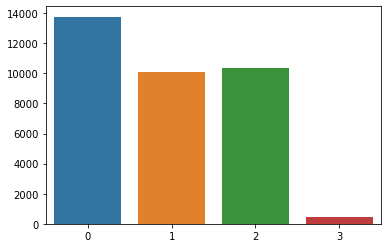

In [90]:
import seaborn as sns
imps = model.rfmodel.importances()
sns.barplot(x=np.arange(len(imps)),y=imps)

In [91]:
imps

array([13769.0740712 , 10083.47046898, 10360.00044604,   460.03949159])

In [92]:
from sklearn.preprocessing import normalize,minmax_scale

In [93]:
minmax_scale(imps)

array([1.        , 0.72307506, 0.74385267, 0.        ])

In [94]:
debug_imps[0]

[(1, 1773.9053859608248), (2, 11348.137396603357)]

In [113]:
model.stat_

In [111]:
np.mean(model.stat_.imp_stat,1)

array([22082.1260925 ,  4323.49911517, 19152.59283122,   275.8467954 ])

##########################################################################################
Feature 0
[(1, 1773.9053859608248), (2, 11348.137396603357)]


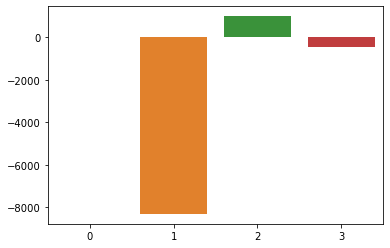

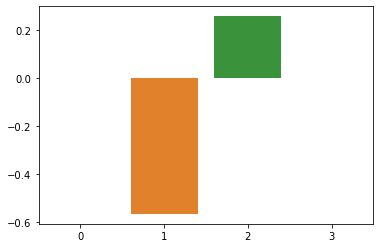

##########################################################################################
Feature 1
[(0, 9757.002016967192), (2, 1908.99020378344)]


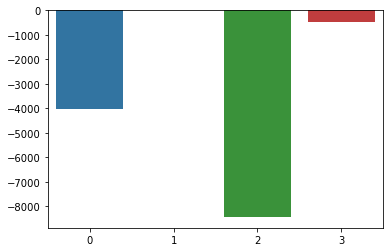

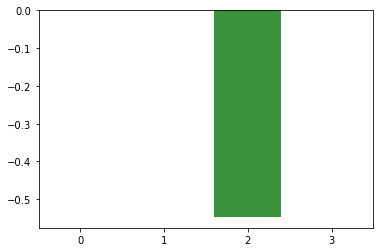

##########################################################################################
Feature 2
[(0, 9421.253111609753), (1, 11364.688952279743)]


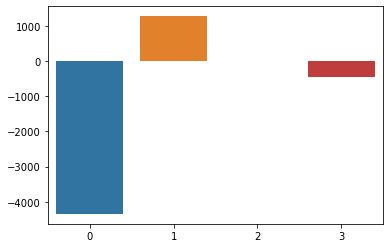

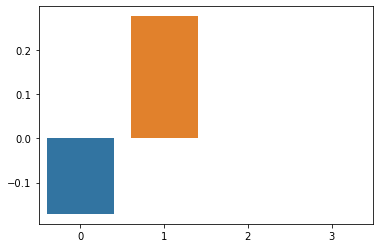

In [112]:
for i,i_imps in debug_imps.items():
    print("#"*90)
    print(f"Feature {i}")
    loc_imp = np.zeros(len(imps))
    print(i_imps)
    for val in i_imps:
        loc_imp[val[0]] = val[1]
    #sns.barplot(x=np.arange(len(loc_imp)),y=minmax_scale(loc_imp))

    diff = loc_imp - imps
    diff[i] = 0
    sns.barplot(x=np.arange(len(loc_imp)),y=diff)
    plt.show()
    
    scaled_diff = minmax_scale(loc_imp) -   minmax_scale(imps)
    scaled_diff[i] = 0
    sns.barplot(x=np.arange(len(loc_imp)),y=scaled_diff)
    plt.show()

In [9]:
changes = model.stat_.d_imp_changes

In [10]:
scores = model.stat_.d_scores

In [96]:
import pandas as pd

In [97]:
series = []
for i in range(len(changes)):
    s =pd.DataFrame(changes[i]).mean()
    series.append(s)


In [98]:
combined = pd.DataFrame(series)

In [99]:
normal_imps = model.rfmodel.importances()

In [109]:
diff_to_normal = np.abs(combined - normal_imps)

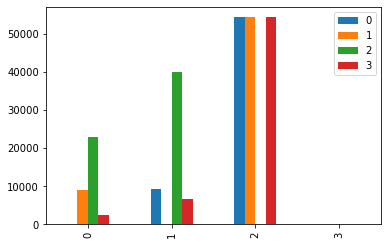

In [110]:
combined.T.plot(kind="bar")

In [111]:
diff_to_normal

,0,1,2,3
0,2.499950e+03,2500.063888,0.000000,9.814388e-15
1,6.623194e+03,6750.260915,0.000000,2.355820e-01
2,2.034042e+04,33292.324210,54299.633179,1.676675e+00
3,9.094947e-13,0.000000,0.000000,8.947602e-15


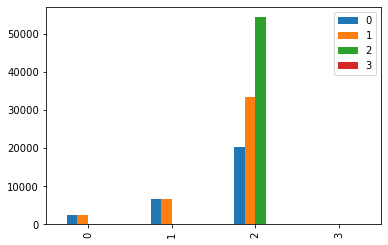

In [112]:
diff_to_normal.plot(kind="bar")

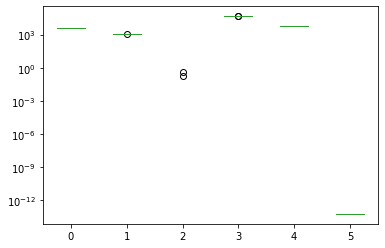

In [21]:
pd.DataFrame(changes[2]).plot(kind="box",logy=True)

# analyse importance threshold depending on input features

without scaling the shadow samples are not normal distributed 

-> leads to meany false positives in feature classification

In [8]:
samps = model.stat_.shadow_importance_samples

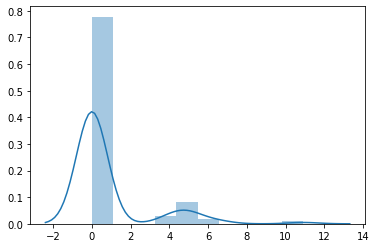

In [9]:
sns.distplot(samps)

In [10]:
np.max(samps)

10.925336763262749

In [11]:
from squamish.stat import _create_probe_statistic

In [12]:
_create_probe_statistic(samps,1e-6)

(-9.363162962016322, 10.975216522332886)

In [13]:
model.stat_.shadow_stat

(-9.363162962016322, 10.975216522332886)

In [14]:
model.rfmodel.importances()> np.max(samps)

array([ True,  True,  True,  True,  True, False])

In [422]:
np.max(imps[5:])

54.63547718524933

In [395]:
model.relevance_classes_

array([2, 2, 1, 1, 1, 0, 0, 0, 0, 0])

# Graph

In [554]:
model.relations_

{0: [], 2: [], 3: [], 4: []}

In [555]:
import networkx as nx

In [556]:
g = nx.Graph(model.relations_)

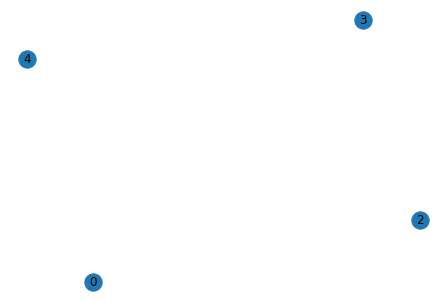

In [557]:
nx.draw(g,with_labels=True)

In [558]:
imps = model.stat_.imp_stat

In [559]:
imps

[(-4918.555561299697, 7143.435542139438),
 (-1795.4598823944661, 2581.0131922470464),
 (-3940.6038567346013, 11933.17506530699),
 (-59838.61829018101, 127995.99797036618),
 (-69156.19880041215, 103043.69077609022)]

In [560]:
np.diff(imps,axis=1)

array([[ 12061.99110344],
       [  4376.47307464],
       [ 15873.77892204],
       [187834.61626055],
       [172199.8895765 ]])